In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import glob
from matplotlib import pyplot as plt
import cv2
import pandas as pd
from csv import DictReader
from sklearn.model_selection import train_test_split
from PIL import Image
from torch.nn import Flatten, Linear, ReLU, Conv2d,MaxPool2d, AdaptiveAvgPool2d
from tqdm.notebook import tqdm

In [2]:
!ls /kaggle/input/acc-german-traffic-sign-classification/GTSRB_Challenge

sample_submission.csv  test  train


In [3]:
sample_submission_path = '../input/acc-german-traffic-sign-classification/GTSRB_Challenge/sample_submission.csv'
sample_submission = pd.read_csv(sample_submission_path)

In [4]:
sample_submission.shape
sample_submission.head()

,Filename,ClassId
0,1558973073.8358536.ppm,1
1,1558973073.8359206.ppm,1
2,1558973073.8359365.ppm,1
3,1558973073.8359509.ppm,1
4,1558973073.8359642.ppm,1


In [5]:
# open file in read mode
with open(sample_submission_path, 'r') as read_obj:
    # pass the file object to DictReader() to get the DictReader object
    csv_dict_reader = DictReader(read_obj)
    # iterate over each line as a ordered dictionary
    print_every = 1000
    cnt = 1
    for row in csv_dict_reader:
        # row variable is a dictionary that represents a row in csv
        if cnt % print_every == 0:
            print(row)
        cnt += 1

OrderedDict([('Filename', '1558973073.8460295.ppm'), ('ClassId', '1')])
OrderedDict([('Filename', '1558973073.8513303.ppm'), ('ClassId', '1')])
OrderedDict([('Filename', '1558973073.8562262.ppm'), ('ClassId', '1')])
OrderedDict([('Filename', '1558973073.862523.ppm'), ('ClassId', '1')])
OrderedDict([('Filename', '1558973073.8672273.ppm'), ('ClassId', '1')])
OrderedDict([('Filename', '1558973073.8719406.ppm'), ('ClassId', '1')])
OrderedDict([('Filename', '1558973073.8761585.ppm'), ('ClassId', '1')])
OrderedDict([('Filename', '1558973073.881586.ppm'), ('ClassId', '1')])
OrderedDict([('Filename', '1558973073.8860836.ppm'), ('ClassId', '1')])
OrderedDict([('Filename', '1558973073.8908193.ppm'), ('ClassId', '1')])
OrderedDict([('Filename', '1558973073.8953412.ppm'), ('ClassId', '1')])
OrderedDict([('Filename', '1558973073.8996737.ppm'), ('ClassId', '1')])


In [6]:
!ls /kaggle/input/acc-german-traffic-sign-classification/GTSRB_Challenge/t

ls: cannot access '/kaggle/input/acc-german-traffic-sign-classification/GTSRB_Challenge/t': No such file or directory


# # Data set has 43 classes

In [7]:
!ls /kaggle/input/acc-german-traffic-sign-classification/GTSRB_Challenge/train

00000  00004  00008  00012  00016  00020  00024  00028	00032  00036  00040
00001  00005  00009  00013  00017  00021  00025  00029	00033  00037  00041
00002  00006  00010  00014  00018  00022  00026  00030	00034  00038  00042
00003  00007  00011  00015  00019  00023  00027  00031	00035  00039


In [8]:
!ls /kaggle/input/acc-german-traffic-sign-classification/GTSRB_Challenge/train/00040

00000_00000.ppm  00003_00000.ppm  00006_00000.ppm  00009_00000.ppm
00000_00001.ppm  00003_00001.ppm  00006_00001.ppm  00009_00001.ppm
00000_00002.ppm  00003_00002.ppm  00006_00002.ppm  00009_00002.ppm
00000_00003.ppm  00003_00003.ppm  00006_00003.ppm  00009_00003.ppm
00000_00004.ppm  00003_00004.ppm  00006_00004.ppm  00009_00004.ppm
00000_00005.ppm  00003_00005.ppm  00006_00005.ppm  00009_00005.ppm
00000_00006.ppm  00003_00006.ppm  00006_00006.ppm  00009_00006.ppm
00000_00007.ppm  00003_00007.ppm  00006_00007.ppm  00009_00007.ppm
00000_00008.ppm  00003_00008.ppm  00006_00008.ppm  00009_00008.ppm
00000_00009.ppm  00003_00009.ppm  00006_00009.ppm  00009_00009.ppm
00000_00010.ppm  00003_00010.ppm  00006_00010.ppm  00009_00010.ppm
00000_00011.ppm  00003_00011.ppm  00006_00011.ppm  00009_00011.ppm
00000_00012.ppm  00003_00012.ppm  00006_00012.ppm  00009_00012.ppm
00000_00013.ppm  00003_00013.ppm  00006_00013.ppm  00009_00013.ppm
00000_00014.ppm  00003_00014.ppm  00006_00014.ppm  00009_00014

In [9]:


#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device

In [10]:

# data <class id, file_name>
# Load data file names
data = []
cnt = 0
for file_name in glob.glob('/kaggle/input/acc-german-traffic-sign-classification/GTSRB_Challenge/train/*/*.ppm'):
    im_class = int(file_name.split('/')[-2])
    data.append((im_class, file_name)) 

In [11]:
data[0]

(13,
 '/kaggle/input/acc-german-traffic-sign-classification/GTSRB_Challenge/train/00013/00031_00005.ppm')

In [12]:
print(data[0][0]) # -> class number
print(data[0][1]) # -> image_path

13
/kaggle/input/acc-german-traffic-sign-classification/GTSRB_Challenge/train/00013/00031_00005.ppm


# Split dataset to train_set and val_set

In [13]:
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(data, test_size = 0.2)
print(f'train size is: {len(train_data)}')
print(f'val size is: {len(val_data)}') 

train size is: 31367
val size is: 7842


# split data to <class_label, Path> 

In [14]:
# x -> path 
# y -> class_label
train_y    = [data[0] for data in train_data]
train_x    = [data[1] for data in train_data]
val_y     = [data[0] for data in val_data]
val_x     = [data[1] for data in val_data]

In [15]:
print('image_Path is',train_x[0])
print('class_label is',train_y[0])

image_Path is /kaggle/input/acc-german-traffic-sign-classification/GTSRB_Challenge/train/00001/00037_00005.ppm
class_label is 1


# Creating Dataset

In [16]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, images, labels, transform = None):
        self.labels   = labels
        self.images = images
        self.transform = transform
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        i = self.images[index]
        x = Image.open(i)
        y = self.labels[index]
        
        if self.transform != None:
            x = self.transform(x)
    
        return x,y

In [17]:
label_map = {
    0: '20_speed',1: '30_speed',2: '50_speed',3: '60_speed',
    4: '70_speed',5: '80_speed',6: '80_lifted',
    7: '100_speed',8: '120_speed',9: 'no_overtaking_general',
    10: 'no_overtaking_trucks',11: 'right_of_way_crossing',
    12: 'right_of_way_general', 13: 'give_way',14: 'stop',15: 'no_way_general',
    16: 'no_way_trucks',17: 'no_way_one_way',18: 'attention_general',
    19: 'attention_left_turn',20: 'attention_right_turn',21: 'attention_curvy',
    22: 'attention_bumpers',23: 'attention_slippery', 24: 'attention_bottleneck',
    25: 'attention_construction',26: 'attention_traffic_light',
    27: 'attention_pedestrian', 28: 'attention_children',29: 'attention_bikes',
    30: 'attention_snowflake',31: 'attention_deer',32: 'lifted_general',
    33: 'turn_right', 34: 'turn_left',35: 'turn_straight',
    36: 'turn_straight_right', 37: 'turn_straight_left', 38: 'turn_right_down',
    39: 'turn_left_down',40: 'turn_circle',41: 'lifted_no_overtaking_general',
    42: 'lifted_no_overtaking_trucks'
}

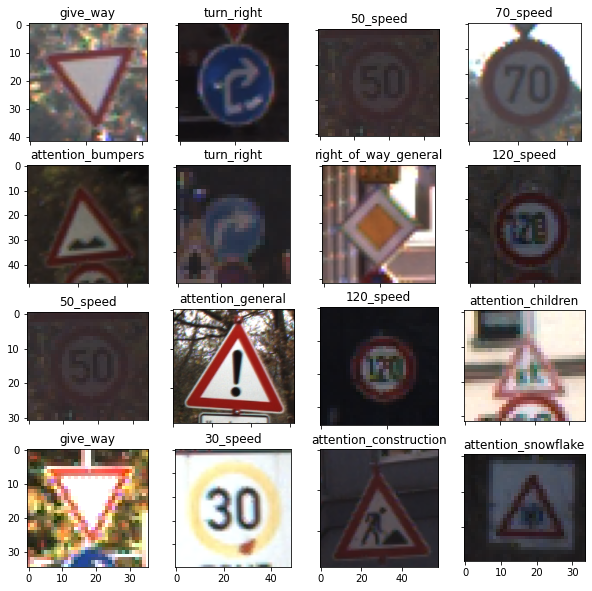

In [18]:
# creating object from Dataset class
trainset   = Dataset(train_x, train_y)
fig, axis = plt.subplots(4,4, figsize=(10,10))
k = 1
for i in range(1, 5):
    for j in range(1, 5):
        img, label = trainset[j*k]
        axis[i - 1][j - 1].imshow(img)
        axis[i - 1][j - 1].set_title(label_map[label])
        print("")
        k += 1
for ax in axis.flat:
    ax.label_outer()

In [19]:
transform = transforms.Compose(
    [transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))]
)

In [20]:
trainset = Dataset(train_x, train_y, transform=transform)
valset   = Dataset(val_x, val_y, transform=transform)

In [21]:
x, y = trainset[0]
print(type(x))

<class 'torch.Tensor'>


In [22]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(valset, batch_size=16,
                                          shuffle=False, num_workers=2)

data_loaders = {'train':train_loader, 'val':val_loader} 
print(len(train_loader))
print(len(val_loader))

1961
491


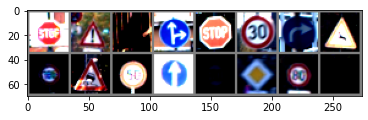

In [23]:
def imshow(img):
    # Unnormalize from (-1 : 1) to (0 : 1)
    img = img / 2 + 0.5
    # converting from tensor to numpy
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1, 2, 0)))
    plt.show()
dataiter = iter(train_loader)
a = dataiter.next()
imshow(torchvision.utils.make_grid(a[0]))

In [24]:
model = torchvision.models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [25]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [26]:
import torch.nn as nn
# The new Added convolution layer
Added_Layers = torch.nn.modules.Sequential(Conv2d(in_channels=512, out_channels=512,
                                            kernel_size=3, padding=1, stride=1),
                                    ReLU(),
                                    AdaptiveAvgPool2d(output_size=(7, 7))
                                    )
# Freeze all layers
for param in model.parameters():
    param.requires_grad = False


# Parameters of newly constructed modules have requires_grad=True by default
# Replace the last layers
model.avgpool =Added_Layers
model.classifier = nn.Linear(25088, 43)  
# Optimize only the parameters of ''classifier', and 'avgpool'
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=1e-3)

model.train()
model = model.cuda()

In [27]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [28]:
model2 = torch.nn.modules.Sequential(Conv2d(in_channels=3, out_channels=10, 
                                    kernel_size=3, padding=1, stride=1),
                                    ReLU(),
                                    MaxPool2d(2, 2),   
                                    Conv2d(in_channels=10, out_channels=20,
                                    kernel_size=3, padding=1, stride=1),
                                    ReLU(),
                                    MaxPool2d(2, 2),
                                    Conv2d(in_channels=20, out_channels=15, 
                                    kernel_size=3, padding=1, stride=1),
                                    ReLU(),
                                    Flatten(),
                                    Linear(15*8*8, 43)
                                    )
model2 = model2.cuda()
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3)

In [29]:
step_losses = []
epoch_losses = []

In [30]:
print_every = 200
num_epochs = 15

for epoch in range(num_epochs):
    print('Epoch number:', epoch)
    
    epoch_loss = 0

    # For each epoch, do training on the trainset
    # Then evaluate the accuracy on the validation set
    for phase in ['train', 'val']:# iterate on train then validate
        print(phase)

        if phase == 'train':
            model2.train()
        else:
            model2.eval()

        total_loss = 0
        total_examples = 0
        total_correct = 0

        # Loop over training / validation data
        for iteration, (X, y) in enumerate(data_loaders[phase]):
            # Forward
            X = X.cuda()
            y = y.cuda()
            scores = model2(X)

            # Backward
            loss = torch.nn.functional.cross_entropy(scores, y)
            epoch_loss += loss.item()
            step_losses.append(loss.item())
            # Update the network only on training data
            if phase == 'train':

                # Backpropagate the loss
                loss.backward()
                # Then update the network parameters
                with torch.no_grad():
                    optimizer.step()
                    optimizer.zero_grad()
            # Accuracy
            preds = torch.argmax(scores, dim=1)
            num_correct = torch.sum(preds == y)        

            # Print
            total_loss += loss.item()
            total_correct += num_correct.item()
            total_examples += len(X)
            if iteration % print_every == 0:
                print(total_loss / total_examples, total_correct / total_examples)
        epoch_losses.append(epoch_loss/len(data_loaders))

Epoch number: 0
train
0.23556512594223022 0.0625
0.19206502362715072 0.19029850746268656
0.1504862244308292 0.3368142144638404
0.12190402686261198 0.45486688851913476
0.10289629803419337 0.5365168539325843
0.08923945089496978 0.5969655344655345
0.07879569385546592 0.6437864279766861
0.07080685670065795 0.6786670235546038
0.0644765365221651 0.7066677076826983
0.05931519846292161 0.7294211549139367
val
0.005694761872291565 0.9375
0.016557903409546326 0.9222636815920398
0.016279208602759977 0.9222256857855362
Epoch number: 1
train
0.01607307605445385 0.9375
0.011727934414509276 0.9443407960199005
0.011353366395627758 0.9462281795511222
0.01134355298055741 0.9458194675540765
0.011010441556633775 0.947565543071161
0.010599812720677953 0.9496753246753247
0.010393898499025453 0.951342631140716
0.01014666771775095 0.9534261241970021
0.009913069555255472 0.954286383510306
0.009628079744807831 0.9555108273181566
val
0.003769014962017536 0.9375
0.01062590803478124 0.9465174129353234
0.01094758385

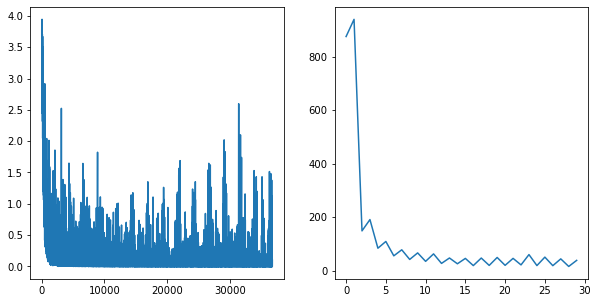

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(step_losses)
axes[1].plot(epoch_losses)

In [32]:
print(total_correct / total_examples)
print(total_loss / total_examples)

0.9844427441979087
0.005799435425106049


In [33]:
images= []
for img in glob.glob('/kaggle/input/acc-german-traffic-sign-classification/GTSRB_Challenge/test/*'):
    images.append(img)


In [34]:
images[0]

'/kaggle/input/acc-german-traffic-sign-classification/GTSRB_Challenge/test/1558973073.8946502.ppm'

In [35]:
# test_loc -> PATH
# test_id  -> image_name ... (1558973073.8946502.ppm)
test_loc = [x for x in images]
test_id  = [x.split('/')[-1] for x in images]
test_data_set = Dataset(test_loc, test_id , transform = transform)
test_loader   = torch.utils.data.DataLoader(test_data_set, batch_size=4,
                                          shuffle=True, num_workers=2)

In [36]:
    output = open('answer3.csv', 'w+')
    output.write('Filename,ClassID\n')
    
    with torch.no_grad():
        for iteration, (X, y) in enumerate(test_loader): 
            X = X.cuda()
            scores = model(X)
            preds = torch.argmax(scores, dim=1)  
            for idd,cla in zip(y,preds):
                output.write(f'{idd},{cla.item()}\n') 
    output.close()
    
          